In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
from scipy import stats

In [38]:
#df = pd.read_csv("final-from-raw/results/ancA5A6_summary.csv",index_col=0)
df = pd.read_csv("final-from-raw_alt/results/altAll_summary.csv",index_col=0)

df = df[df.E == -4]
df.head()

,E,---,aA5A6,hA5,hA6,aA5A6-hA5,aA5A6-hA6,hA5-hA6,aA5A6-hA5-hA6
30,-4.0,19180,36,341,57,1,1,36,0


In [39]:
cutoff = -4.0
num_samples = 1000

divergent = df["hA5"]
convergent = df["hA5-hA6"]
ancestral = df["aA5A6-hA5"] + df["aA5A6-hA5-hA6"]

#divergent = df["hA6"]
#convergent = df["hA5-hA6"]
#ancestral = df["aA5A6-hA6"] + df["aA5A6-hA5-hA6"]

regions = {"divergent":np.sum(divergent[df.E >= cutoff]),
           "convergent":np.sum(convergent[df.E >= cutoff]),
           "ancestral":np.sum(ancestral[df.E >= cutoff])}

region_names = np.arange(len(regions.keys()),dtype=np.int) 
fx_vector = np.array([regions[r] for r in regions.keys()])
fx_vector = fx_vector/np.sum(fx_vector)

total_peptides_vs_E = divergent + convergent + ancestral


In [40]:
fx_vector

array([0.9021164, 0.0952381, 0.0026455])

In [37]:
out_dict = {"E":[],
            "obs":[],
            "mu":[],
            "sigma":[],
            "ninetyfive":[],
            "p":[],
            "region":[]}

for i, num_pep in enumerate(total_peptides_vs_E):

    # What did we see in each region 
    what_was_seen = np.array((divergent[i],convergent[i],ancestral[i]))
    
    out = np.zeros((num_samples,len(region_names)),dtype=int)
    for j in range(num_samples):
        
        # Draw randomly, with replacement, from the region names with fx_vector
        # probabilities num_pep times.
        s = np.bincount(np.random.choice(region_names,
                                         size=num_pep,
                                         replace=True,
                                         p=fx_vector))
        out[j,:len(s)] = s

    # Mean and standard deviations of draw distributions
    mu = np.mean(out,axis=0)
    sigma = np.std(out,axis=0)
    
    # Calculate proability of seeing what_was_seen 
    
    Z = (what_was_seen - mu)/sigma
    p = stats.norm.sf(abs(Z))

    for j, r in enumerate(regions.keys()):
        out_dict["E"].append(df.E.iloc[i])
        out_dict["obs"].append(what_was_seen[j])
        out_dict["mu"].append(mu[j])
        out_dict["sigma"].append(sigma[j])
        out_dict["ninetyfive"].append(sigma[j]*2.92)
        out_dict["p"].append(p[j])
        out_dict["region"].append(r)
        
out_df = pd.DataFrame(out_dict)

KeyError: 0

In [26]:
4992913/(3382*3382/2)

0.873045318363717

Text(0, 0.5, 'counts')

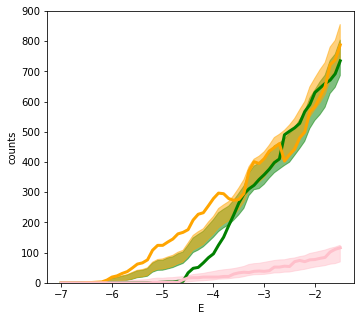

In [27]:

fig, ax = plt.subplots(figsize=(5.5,5))


def add_series(df,region,color,ax):
    
    a = df[df.region == region]

    ax.plot(a.E,a.obs,color=color,linewidth=3)
    x = np.concatenate((a.E,a.E[::-1]))
    y = np.concatenate((a.mu + a.ninetyfive,(a.mu - a.ninetyfive)[::-1]))
    ax.fill(x,y,color=color,alpha=0.5)

#add_series(out_df,"ancestral","gray",ax)
#add_series(out_df,"divergent","purple",ax)
#add_series(out_df,"convergent","pink",ax)

add_series(out_df,"ancestral","green",ax)
add_series(out_df,"divergent","orange",ax)
add_series(out_df,"convergent","pink",ax)

ax.set_ylim(0,900)
ax.set_xlabel("E")
ax.set_ylabel("counts")
#fig.savefig("/Users/harmsm/Desktop/hA6-counts-95.pdf")


In [28]:
out_df[out_df.E == -5.5]

,E,obs,mu,sigma,ninetyfive,p,region
45,-5.5,62,30.107,3.980647,11.623489,5.642250e-16,divergent
46,-5.5,0,3.651,1.803108,5.265076,2.144205e-02,convergent
47,-5.5,0,28.242,3.898902,11.384794,2.184999e-13,ancestral


In [23]:
43 + 19 + 15

77